# 1️⃣ **Introduction to Multiple Linear Regression (MLR)**

**Definition**:
Multiple Linear Regression is a statistical technique used to model the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, ..., Xₙ).**

### **Mathematical Form of Multiple Linear Regression**

The equation of Multiple Linear Regression is:
- if the independent variables are 2 then this is the eq of plane
- but if the independent variable are 3 then it is called eq of hyperplane
- similarly it forms other different curvatures

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:  

- $Y$ → Dependent variable (target)  
- $X_1, X_2, \dots, X_n$ → Independent variables (features)  
- $\beta_0$ → Intercept (constant term)  
- $\beta_1, \dots, \beta_n$ → Coefficients (how much $Y$ changes with $X_i$)  
- $\epsilon$ → Error term (residuals)  

**Key Idea:**  
MLR estimates coefficients ($\beta$) to **minimize the sum of squared errors** between actual and predicted $Y$.

<hr>


# 2️⃣ **Assumptions of Multiple Linear Regression**

### Before applying MLR, ensure these assumptions are reasonably satisfied:

1. **Linearity**: Relationship between independent variables and dependent variable is linear.

2. **Independence**: Observations are independent of each other.

3. **Homoscedasticity**: Residuals have constant variance.

4. **Normality**: Residuals(errors) are normally distributed.

5. **No multicollinearity**: Independent variables (predictors) are not highly correlated.

# 📘 Assumptions of Linear Regression

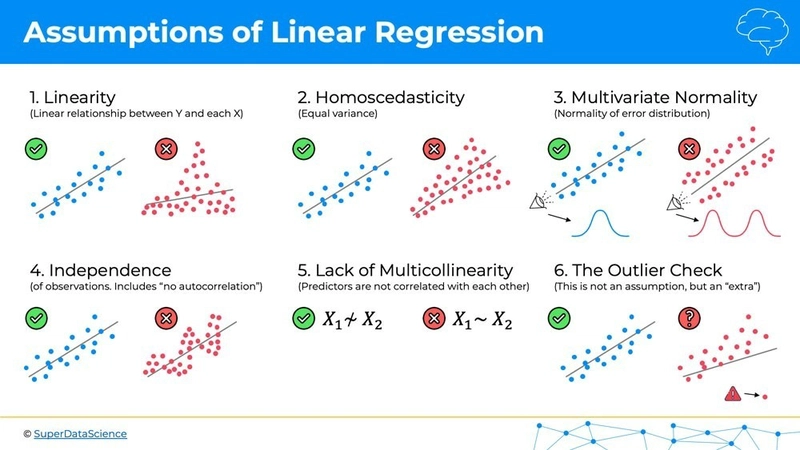

Linear Regression works best when certain statistical assumptions are satisfied.  
If these assumptions are violated, the model’s predictions or statistical inferences (like p-values, R²) can become unreliable.

---

## 1️⃣ Linearity
**Meaning:**  
There should be a linear relationship between the independent variable(s) (X) and the dependent variable (Y).  
That is, a change in X produces a proportional change in Y.

**Examples:**
- ✅ Example (Valid): Height vs Weight — taller people tend to weigh more linearly.  
- ❌ Example (Invalid): Age vs Happiness — the relationship might be curved (non-linear).

---

## 2️⃣ Independence of Errors
**Meaning:**  
The residuals (errors) should be independent of each other.  
That means the error from one observation should not influence the error of another.

**Examples:**
- ✅ Example: Randomly collected survey responses (independent samples).  
- ❌ Example: Time series data like stock prices — residuals are autocorrelated.

---

## 3️⃣ Homoscedasticity 
**`(Homo means: "same" and scedasticity means : "dispersion/scattering" referring to the variance or spread of a random variable)`**

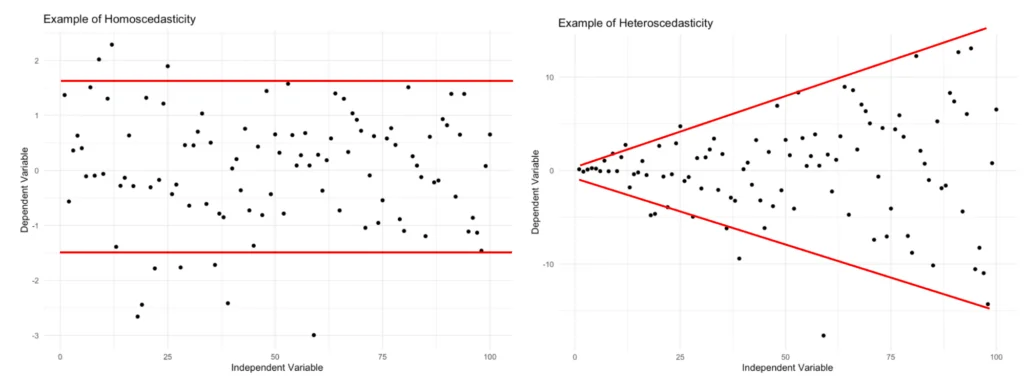

**Meaning:**  
The variance of residuals should remain constant across all levels of the independent variables.  
In other words, the spread of errors should be roughly the same throughout.

**Examples:**
- ✅ Example: Errors scattered evenly across all predicted values.  
- ❌ Example: Residuals fan out (increase) as predicted values increase — known as heteroscedasticity.

---

## 4️⃣ Normality of Residuals
**Meaning:**  
The residuals should follow a normal distribution (bell-shaped curve).  
This ensures that hypothesis tests (like t-test or F-test) are valid.

**Examples:**
- ✅ Example: Residual histogram looks symmetric and bell-shaped.  
- ❌ Example: Residuals are highly skewed (many large outliers).

---

## 5️⃣ No Multicollinearity (for Multiple Linear Regression)
**Meaning:**  
Independent variables should not be highly correlated with each other.  
High correlation makes it hard to distinguish their individual effects on Y.

**Examples:**
- ✅ Example: “Age” and “Education Level” are somewhat related but not redundant.  
- ❌ Example: “Years of Experience” and “Age” are highly correlated — causing multicollinearity.

---

## 6️⃣ No Autocorrelation (especially in Time Series)
**Meaning:**  
Residuals should not be correlated across time.  
Autocorrelation means the model misses some temporal structure in the data.

**Examples:**
- ✅ Example: Residuals appear random in time-series plot.  
- ❌ Example: Residuals follow a repeating pattern (like a wave).

---

## ✅ Bonus: No Significant Outliers
**Meaning:**  
Outliers can heavily influence the regression line and distort results.  
It’s important to detect and handle them properly.

**Examples:**
- ✅ Example: All points lie near the trend line.  
- ❌ Example: One data point lies far away and pulls the regression line toward itself.

---



# 3️⃣ **Steps to Perform Multiple Linear Regression in Python**

We usually use **statsmodels** or **sklearn** libraries. Let’s explain statsmodels first, because it gives detailed statistical output.

## ➡️ **Step1. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## ➡️ **Step2. Load Data**

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [3]:
df.shape

(30, 3)

## ➡️ Checking for null values in data

In [4]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

## ➡️ Checking the Linearity of both the independent variables with respect to the dependent variable by using `sns.pairplot()`

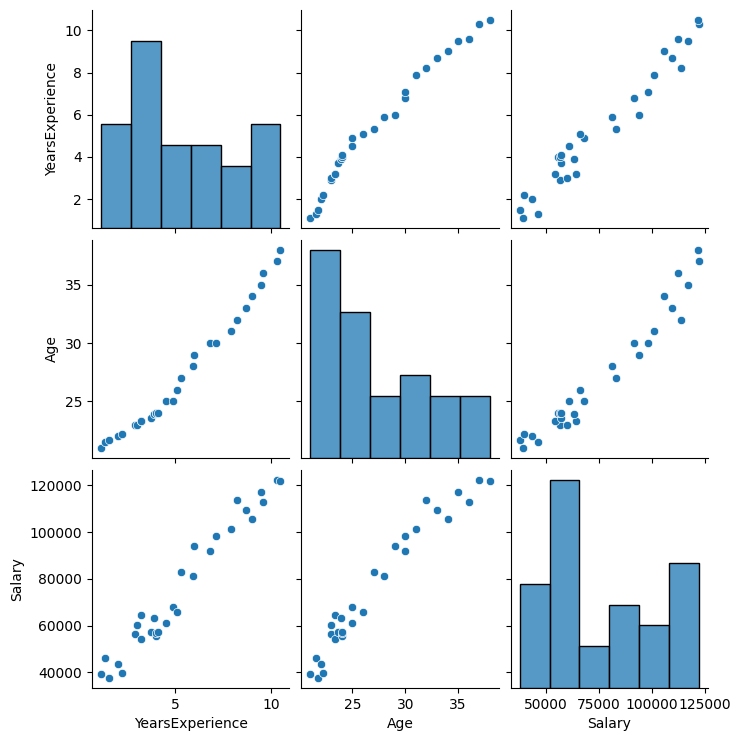

In [5]:
sns.pairplot(data = df,)

plt.show()

## ➡️ using heatmap with correlation to check the linearity of these variables with the target variable

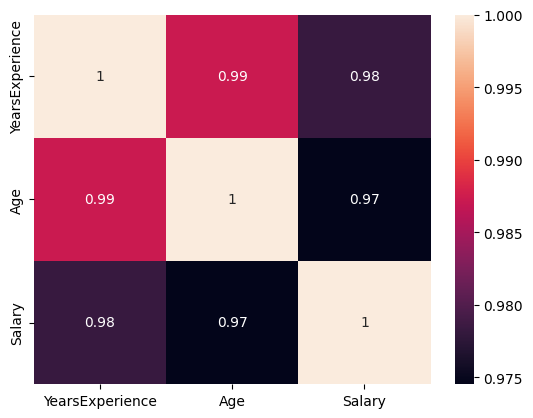

In [6]:
sns.heatmap(
    data = df.corr(), #using corr() method over the data
    annot = True, #this will give the annotation of correlation between them
    )

plt.show()

## ➡️ **Step3: Define Dependent and Independent Variables**

In [7]:
x = df.iloc[:,: - 1]
x.ndim

2

In [8]:
y = df["Salary"]
y.ndim

1

## ➡️ Now Splitting the data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 21)

## ➡️ Now Importing LinearRegression from linear_model module of sklearn library

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

## **➡️ now `lr.fit(x,y)` will train the eq : $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon $$ on the dataset to find the best values of different $$\beta_i (slopes) and \beta_0 (intercept) $$**

In [13]:
lr.fit(x_train, y_train)

LinearRegression()

## ➡️ Now checking the score

In [14]:
lr.score(x_test, y_test)

0.9409862667300515

## ➡️ Now Interpreting the Coefficients `y = m1x1 + m2x2 + c`

In [15]:
# y = m1x1 + m2x2 + c
lr.coef_

array([5770.34291987, 1994.50989264])

In [16]:
lr.intercept_

np.float64(-10052.54518418423)

In [17]:
# y_prd = 5770.34291987*Experience + 1994.50989264*Age - 10052.54518418423
yp = 5770.34291987*1.1 + 1994.50989264*21.0 - 10052.54518418423
print(yp)

38179.53977311277


In [18]:
df.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [19]:
lr.predict([[1.1 , 21.0]])

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38179.53977304])

# 4️⃣ Checking Assumptions of Multiple Linear Regression

**These assumptions are what make Linear Regression statistically valid.**

### **🧩 Assumptions of Multiple Linear Regression**

| #   | Assumption             | Meaning                                                        |
| --- | ---------------------- | -------------------------------------------------------------- |
| 1️⃣ | Linearity              | Relationship between predictors (X) and response (Y) is linear |
| 2️⃣ | Independence           | Observations are independent of each other                     |
| 3️⃣ | Homoscedasticity       | Constant variance of residuals                                 |
| 4️⃣ | Normality of Residuals | Errors follow a normal distribution                            |
| 5️⃣ | No Multicollinearity   | Predictors are not highly correlated                           |

### **🧩 Assumptions Checks**

| # | Assumption            | How to Check             | What You Expect            |
| - | --------------------- | ------------------------ | -------------------------- |
| 1 | **Linearity**         | Actual vs Predicted plot | Straight diagonal trend    |
| 2 | **Independence**      | Residuals vs Index       | Random scatter             |
| 3 | **Homoscedasticity**  | Residuals vs Predicted   | Even spread around 0       |
| 4 | **Normality**         | Histogram / Q–Q Plot     | Bell shape / diagonal line |
| 5 | **Multicollinearity** | VIF values               | < 5 (preferably < 10)      |



## **🎯 1️⃣ Compute Predictions and Residuals then Check Linearity**

- **`Residuals = Y_actual - Y_predicted`**
- **Residual analysis ensures assumptions are valid.**

In [20]:
y_pred = lr.predict(x)
residuals = y - y_pred

#### Doing the linearity check once again but now in between y_pred and y

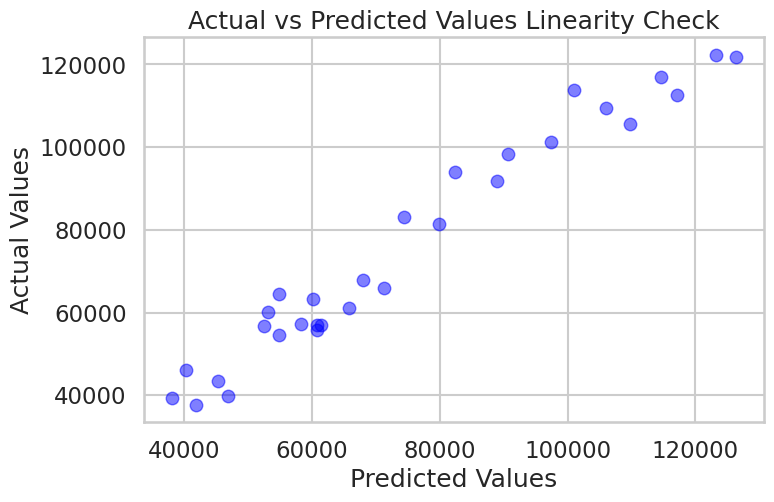

In [21]:
#doing the linearity check once again but now in between y_pred and y

plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(
    x = y_pred, 
    y = y, 
    color = 'blue', 
    marker = 'o', 
    edgecolor = 'blue', 
    alpha = 0.5, 
    linewidth = 1
    )

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values Linearity Check")
plt.show()


### **Interpretation:**

- Points should roughly form a **straight diagonal line.**

- If you see curves or patterns → relationship may not be linear (consider polynomial regression).

## 🔄 2️⃣ **Check Independence of Residuals**

##### ✅ Method:

Plot residuals over observation order (or use Durbin-Watson test).

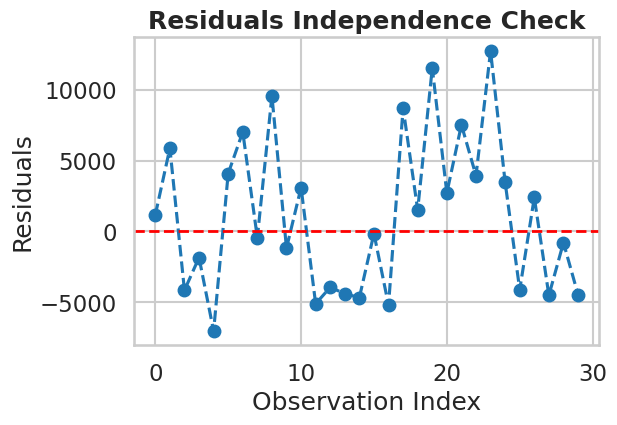

In [23]:
plt.figure(figsize = (6,4))
plt.plot(residuals, marker = 'o', linestyle = '--')# when given the single data input is given plot(takes it as y)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 2)
plt.title("Residuals Independence Check", fontweight = 'bold')
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()



### 🌟🌟🌟 **Interpretation**:

#### **Here in this Plot the positive residual is followed by another positive residual and the negative residual is followed by another negative residual `Which is the Classic Signature of Positive Autocorrelation(also known as Positive serial correlation) in the residuals of a regression model`**

### 📈 Understanding Positive Autocorrelation

**What It Means**  
- Positive autocorrelation occurs when residuals (errors) are correlated across successive observations —  
a **high residual** tends to follow another high one, and a **low residual** tends to follow another low one.

**Visual Characteristics**  
- When plotted over time, residuals show a **smooth, wavelike pattern**: staying above or below the zero line for several points before switching.

**In Contrast: Negative Autocorrelation**  
Here, a **positive residual** is typically followed by a **negative one**, creating a **zigzag** pattern around the zero line.

**Why It’s a Problem**  
Positive autocorrelation violates the OLS assumption of independent errors, causing:
- Inefficient (though unbiased) coefficient estimates.  
- Underestimated standard errors → inflated $t$-statistics and overly narrow confidence intervals.  
- False impressions of predictor significance.


## 📈 3️⃣ **Check Homoscedasticity (Constant Variance)**

### 💡 Meaning of Homoscedasticity

In statistics, particularly in regression analysis, **homoscedasticity** (pronounced *ho-mo-skeh-das-tih-see-tee*) means having **equal variance**.

**More specifically:**
- It is a key assumption in linear regression models.  
- The **variance of residuals (errors)** remains constant across all levels of the independent variable(s).

**What This Looks Like**  
If you plot residuals (actual − predicted values) against the independent variable, under homoscedasticity, the points will form a **uniform band** with no visible pattern (like a funnel shape).

$$
\text{Variance}(\epsilon_i) = \sigma^2 \quad \text{for all } i
$$

where  
- $\epsilon_i$ = residual (error) for observation $i$  
- $\sigma^2$ = constant variance  

**Why is it Important? 🤔**  
When this assumption holds, the **standard errors**, **confidence intervals**, and **hypothesis tests** (like $t$-tests and $F$-tests) for regression coefficients are **reliable and efficient**.

**Antonym**  
The opposite condition is **heteroscedasticity**, where the variance of residuals is **not constant** (“hetero-” = different).


#### ✅ Method:

**Plot residuals vs predicted values.**

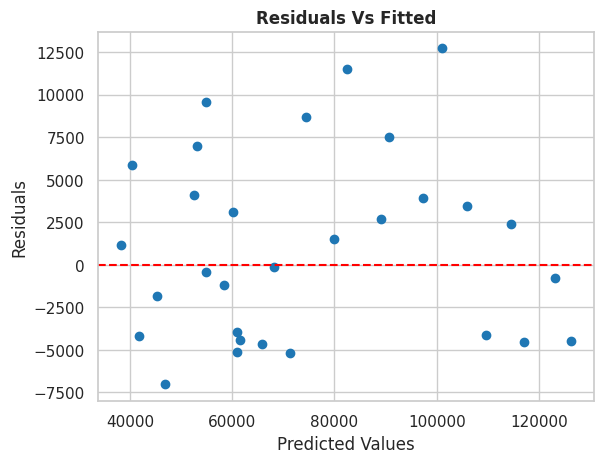

In [ ]:
# Residual Plot
sns.set_context("notebook")

plt.scatter(y_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')   
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Vs Fitted", fontweight = 'bold')
plt.show()

### 🌟🌟🌟 Interpretation of the above plot

1. **Linearity (Assumption Met)**

- **What to look for**: A random scatter of points centered around the horizontal red line at $\text{Residuals} = 0$.
- **Residual Plot**: The points are scattered randomly above and below the zero line across the entire range of predicted values.
- **Interpretation**: There is no obvious curved pattern (like a U-shape). This is excellent. It means the linear relationship your model is based on is appropriate for your data.

2. **Homoscedasticity (Assumption Met)**

- **What to look for**: The vertical spread (variance) of the points should be roughly the same from the left side of the plot to the right side. The opposite of this is a "cone" or "fan" shape, which indicates heteroscedasticity.
- **Residual Plot**: The vertical spread of your residuals is **roughly constant**. The errors at the low end of predictions (e.g., 40k-60k) have a similar spread to the errors at the high end (e.g., 100k-120k).
- **Interpretation**: This is also excellent. It means the model's errors are consistent, and the assumption of **homoscedasticity** (constant variance) is met. This is crucial for trusting the p-values and confidence intervals of your model's coefficients.

## 📊 4️⃣ Check Normality of Residuals

##### ✅ Method 1: Histogram + KDE Plot

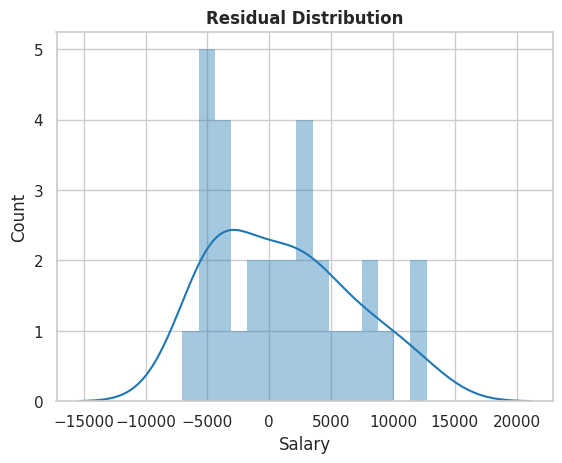

In [ ]:
# Distribution (hist) plot of residuals
sns.histplot(
    residuals,
    kde = True,
    stat = "count",
    # stat = "density",
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    bins = 15
    
)

plt.title("Residual Distribution",fontweight = "bold")
plt.show()

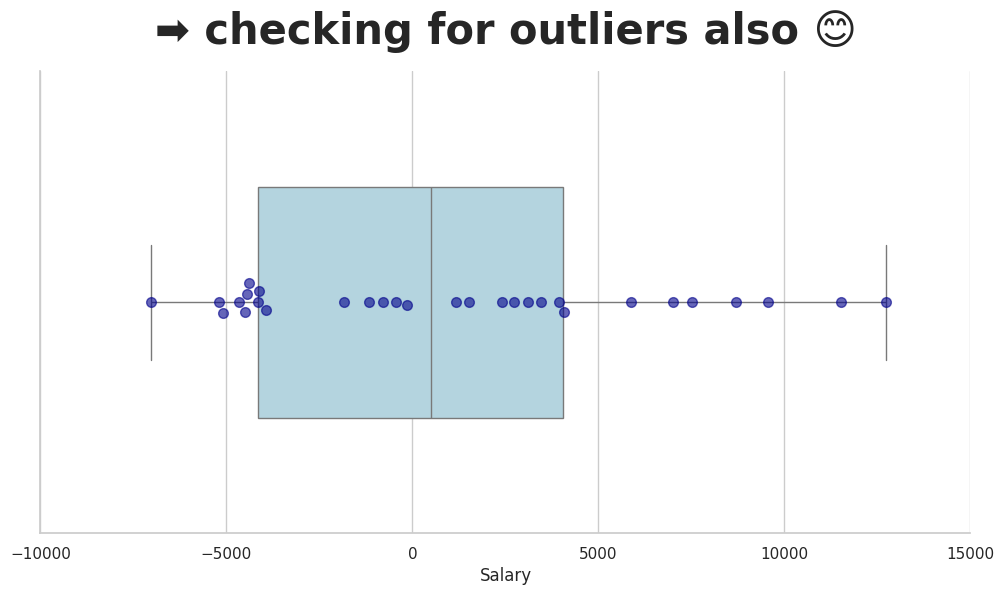

In [ ]:
plt.figure(figsize = (12,6))
plt.xlim(left = -10000, right = 15000)
plt.title("➡️ checking for outliers also 😊", fontweight = "bold", fontsize = 30, pad = 20)
sns.set_context("notebook")
sns.set_style("white")

sns.boxplot(
    residuals,
    color = "lightblue",
    width = 0.5,
    orient='h', # orient = 'h' is used for the horizontal orientation of the plot
    zorder = 1,
)

sns.swarmplot(
    residuals,
    color = 'darkblue',
    size = 7,
    alpha = 0.6,
    edgecolor='darkblue',
    orient = 'h', # to keep the collective plot in horizontal fashion we have to pass this argument in both the plot
    linewidth = 1,
    zorder = 2
)

sns.despine()
plt.show()

##### ✅ Method 2: Q–Q Plot (Quantile-Quantile)

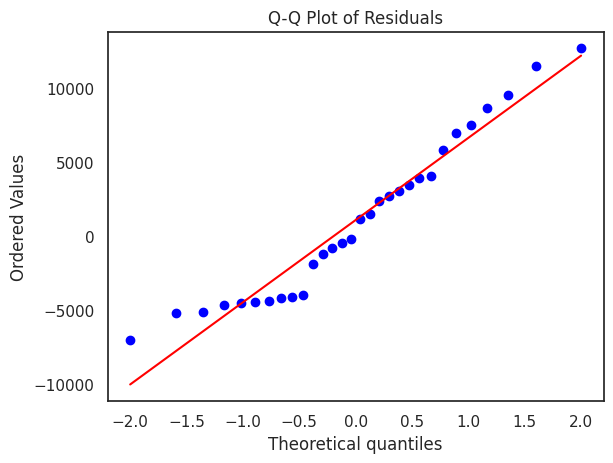

In [ ]:
import scipy.stats as stats

stats.probplot(residuals, dist = 'norm', plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

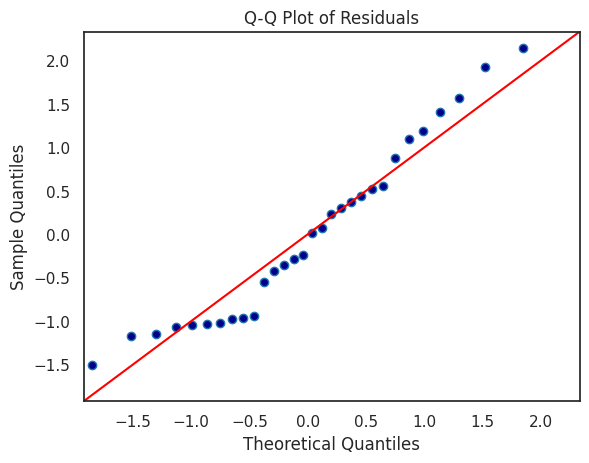

In [ ]:
# already imported above : import statsmodels.api as sm

sm.qqplot(residuals, fit = True, line = '45', markerfacecolor = 'darkblue')
plt.title("Q-Q Plot of Residuals")
plt.show()

### 🌟🌟🌟 Interpretation of the Plot

#### 1️⃣ What the plot shows

- **X-axis (Theoretical Quantiles)**: Expected quantiles if the residuals were perfectly normally distributed.

- **Y-axis (Sample Quantiles)**: Actual quantiles of your regression residuals.

- **Red line**: Represents the ideal normal distribution. If residuals are perfectly normal, all points lie exactly on this line.

#### 2️⃣ How to interpret it

- **Points closely following the red line**: Residuals are approximately normally distributed.

- **Points deviating from the line at the ends (tails)**: Indicates some skewness or heavy/light tails compared to normal distribution.

- **S-shaped curve**: Suggests skewness in residuals.

- **Upward/downward curves at ends**: Suggests heavier or lighter tails than normal.

####  3️⃣ Observations for your plot

- Most points **closely follow the red line**, **indicating** that residuals are **roughly normally distributed**.

- **Minor deviations** at the extremes (very high or low residuals) are visible, but these **are often acceptable in practice**.

✅ **Conclusion**: **The normality assumption of residuals in our simple linear regression seems reasonably satisfied. This supports the validity of confidence intervals, hypothesis tests, and other inference based on this regression.**


<br>
<hr>

# 🧠 **Understanding the Two Functions**

## 1️⃣ **Using `statsmodels.api.qqplot()`**

```python
    import statsmodels.api as sm

    sm.qqplot(residuals, line='45', fit=True, markerfacecolor='darkblue')

```

### 🔍 **What happens inside**:

1. **Takes your residuals** (a 1D array).

2. **Sorts** them in ascending order.

3. **Generates theoretical quantiles from the normal distribution**(by default).

    - Equivalent to saying: “**If residuals were normal, what quantiles would they have?**”
    - **Y-axis (Sample Quantiles):** The actualm sorted values from `residuals` (e.g. the 10th percentile of your actual data).
    - **X-axis(Theoretical Quantiles):** The corresponding quantiles froma "perfect" normal distribution(e.g. the 10th percentile of a theorectical normal distribution)

4. **Fits** a line (optional `fit=True`):

    - It **Scales and Centers the theoretical distribution (the X-axis) to match the residuals.**
  
    - **With `fit = True` (What we are doing):**
        - `sm.qqplot` first looks at the `residual` and estimates their mean $(\mu)$ and standard deviation $(\sigma)$ 
        - It then generates the theoretical quantiles (X-axis) from a normal distribution with that specific, estimated mean and standard deviation 
        - **Result:**`qqplot` comparing the data (Y-axis) to a "custom-built" theoretical distribution(X-axis) that is already centered and scaled to be the best possible fit

5. **Plots** your sample quantiles (Y-axis) vs theoretical quantiles (X-axis).

6. The argument `line='45'` adds a **45° reference line (y = x) for visual comparison**.

#### **Customization options (StatsModels):**

- `line='45'`: 45° line.

- `line='s'`: standardized line.

- `line='r'`: regression line through the points.

- `fit=True`: scales and centers the theoretical Normal Quantiles

#### 📘 **In short**:
👉 `sm.qqplot()` is a **high-level helper** built specifically for **statistical model diagnostics** — it’s tightly integrated with regression analysis.



<br>
<hr>

## **2️⃣ Using `scipy.stats.probplot()`**

```python
    from scipy import stats
    import matplotlib.pyplot as plt

    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()
```
### 🔍 **What happens inside:**

1. **Computes theoretical quantiles** for a given distribution (default = normal).

2. **Sorts your residuals** to create ordered sample quantiles.

3. **Performs a least-squares fit line:**

    $$𝑦 = 𝑠𝑙𝑜𝑝𝑒 × 𝑥 + 𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡$$

   - `slope` and `intercept` are printed in the console output (that’s one difference).

If `plot=plt` is provided, it automatically plots using Matplotlib.

Otherwise, it only returns `(theoretical_quantiles, ordered_residuals, (slope, intercept, r))`.

#### 📘 In short:
👉 `stats.probplot()` is a **generic quantile plotting function for any distribution (not just normal).**
**It is lower-level and more flexible but doesn’t have the automatic formatting of sm.qqplot().**


<br>
<hr>

# 🆚 Comparison Table

| Feature          | `sm.qqplot()` (StatsModels)           | `stats.probplot()` (SciPy)             |
| ---------------- | ------------------------------------- | -------------------------------------- |
| **Library**      | `statsmodels.api`                     | `scipy.stats`                          |
| **Purpose**      | Diagnostic tool for regression models | Generic quantile comparison            |
| **Default dist** | Normal                                | Normal (can change via `dist`)         |
| **Fitting line** | Optional (`fit=True`)                 | Always fits line & returns parameters  |
| **Line options** | '45', 'r', 's', 'q'                   | Single regression fit only             |
| **Output**       | Matplotlib plot                       | Plot + (quantiles, fit stats)          |
| **Usage**        | Quick diagnostic for residuals        | More customizable for any distribution |





# 🔗 5️⃣ **Check for Multicollinearity**

##### Multicollinearity occurs when predictors (independent variables) are highly correlated — this can make coefficients unstable **regression coefficient ($\beta$)**.

##### We use **Variance Inflation Factor (VIF)**.


## ➡️ **Import Variation Inflation Factor from `statsmodels.stats.outliers_influne`**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

## ➡️ **Add constant to X for VIF Calculation**

In [ ]:
x_with_const = sm.add_constant(x_train)

vif_data = pd.DataFrame()

vif_data["Feature"] = x_with_const.columns

# for i in range(x_with_const.shape[1]): ## X_with_const.shape[1] → Number of columns = 3 
    # print(f"outpur ---> {i}") ## so it becomes for i in range(3) thats why loop iterates from 0 -> 1 -> 2

vif_data["VIF"] = [VIF(x_with_const.values, i) for i in range(x_with_const.shape[1])]
# VIF takes two para : ndarry/DataFrame(x_with_const.values), index of exogenous variable (i)

print(vif_data)

#The intercept column itself will typically have a VIF computed by the function, but that VIF is not meaningful and can be ignored.
#basically ignore the const Feature's VIF

           Feature         VIF
0            const  482.439068
1  YearsExperience   37.620080
2              Age   37.620080


### **Interpretation**:

**VIF = 1 → No correlation**

**VIF between 1–5 → Moderate correlation (acceptable)**

**VIF > 10 → High multicollinearity (problematic → remove or combine features)**

# 🌟🌟🌟🌟🌟 **NOTE FOR VIF** **Variation Inflation Factor**

## First lets talk about the Variance 

### **📊 How to Conceptually "Image" Variance**

- Think of **variance** as a measure  **spread of data**, **disagreement** or **inconsistency**.
- Imagine you ask five friends to rate a new movie on a scale of 1 to 10. You get two possible outcomes:

**Scenario 1: Low Variance (High Agreement)**
- **Ratings**: 6, 7, 6, 7, 7
- **Average (Mean)**: 6.6
- **The "Image"**: The opinions are all tightly clustered together. Everyone felt pretty much the same way—it was "just okay." There is **low disagreement**. This dataset is predictable. If you asked a sixth friend, you'd be pretty confident their answer would be a 6 or 7.

**Scenario 2: High Variance (High Disagreement)**
**Ratings**: 1, 10, 1, 10, 5
- **Average (Mean)**: 5.4 (which is very close to the 6.6 above!)
- **The "Image"**: The opinions are all over the place! Two people hated it, two people loved it, and one was in the middle. The "average" score of 5.4 is misleading; it doesn't represent anyone's actual experience. There is **high disagreement**. This dataset is unpredictable and scattered.

**In data science, variance is the measure of that "spread." A low variance feature (like in Scenario 1) is very consistent. A high variance feature (like in Scenario 2) is scattered and has a wide range of values.**

## **Now We Begins with : 🕵️ The Story of the Variance Inflation Factor (VIF) In layman terms**

This is a story about a team of predictors trying to explain a mystery.

- **The Goal (The Model)**: A team of "predictor" variables (e.t., `Age`, `Education`, `Years_of_Experience`) is trying to predict a "target" (e.g., `Salary`).
  
- **The Problem (The "Crime")**: The model needs to know how important each predictor is. But what if some of the predictors are "accomplices"? What if they are secretly working together? This "crime" is called **multicollinearity**.

- **The Accomplices**: Imagine team of predictors includes `Years_of_Experience` and `Age`. These two predictors are likely to be highly correlated. **They are "saying the same thing."** When `Age` goes up, `Years_of_Experience` also goes up.
  
- **The Confusion**: The model gets confused. It doesn't know how to assign credit. It might think:
  
    - ***"Should I give all the credit for the higher salary to `Age`?"***

    - ***"Or should I give it all to `Years_of_Experience`?"***

    - ***"Or maybe I'll give `Age` a huge positive credit and `Years_of_Experience` a huge negative credit, so they cancel out and balance?"***
  
### **`The model becomes unstable. The "importance/credit/weights" (the coefficient) it assigns to each predictor becomes unreliable since model doesn't have a clearity to assign the weights to worthy predictors the variance(disagreement/incosistency) increases ➡️ The variance (instability) gets inflated.`**

👉**Now Enters the "Detective": The VIF 🕵️**

The **Variance Inflation Factor (VIF)** is the detective you hire to find the accomplices (the redundant predictors/variables).

here's how the VIF detective investigates each predictor on the team:

1. **The Interrogation:** The detective picks one predictor (e.g., `Age`) and says, "Stay here."
2. **The Test:** The detective then asks ***all the other predictors*** (`Education`, `Years_of_Experience`, etc.) to try and "predict" `Age`.
3. **The Verdict:**
    - **If the other predictors do a bad job of predicting `Age`:** The detective concludes, "Good. Age is unique. It's bringing its own, independent information to the team." This results in a **low VIF score (near 1)**.
    - **If the other predictors do a great job of predicting `Age`:** The detective concludes, "Aha! `Age` is redundant! Its information is already being provided by the others (especially `Years_of_Experience`). It's not unique." This results in a high **VIF score (e.g., > 5 or > 10)**.

**The "Moral of the Story"**

A VIF score tells you how much a predictor's variance (instability) is being inflated by its relationship with other predictors.

- **VIF = 1**: Not inflated at all. The predictor is independent.

- **VIF = 5**: The variance for this predictor is **5 times larger** than it would be if it were independent. This predictor is highly correlated with others.

- **VIF = 10**: The variance is **10 times larger**. This indicates a serious multicollinearity problem.

**What you do**: If a predictor has a high VIF, it's causing trouble. The detective advises you to remove it (or one of its "accomplices") from the team to make your model stable, reliable, and easier to understand.

---


## 🧠 **Now The Explanation For The CODE Used**

### 1) What each line does (plain explanation)

- `from statsmodels.stats.outliers_influence import variance_inflation_factor
Imports the helper` function that computes the VIF for a given column (variable) in a design matrix.

- `X_with_const = sm.add_constant(X_train)`
Adds a column of ones (an intercept) to the predictor matrix `X_train`, returning a new DataFrame/array where the first column is `const` (unless your data already had one). This yields the design matrix used for VIF calculation.

- `vif_data = pd.DataFrame()`
Creates an empty DataFrame to store feature names and VIF values.

- `vif_data["Feature"] = X_with_const.columns`
Stores the column names (e.g., const, Area, Bedrooms, ...) for human-readable output.

- `vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]`
For each column index` i `in the design matrix, call `variance_inflation_factor` with the full matrix `(X_with_const.values)` and the column index i. This computes VIF for that column and stores the result in the DataFrame.

- `print(vif_data)`
Prints a table of features and their VIF values.

<br>
<hr>

## 2) What is VIF conceptually?

**Variance Inflation Factor (VIF)** measures how much the variance (square of standard error) of an estimated regression coefficient is “inflated” because of linear relationships (multicollinearity) among the predictors.

- If a predictor is nearly uncorrelated with other predictors → **VIF ≈ 1** (no inflation).

- If a predictor is highly predictable from other predictors → **VIF ≫ 1**(inflation).

High VIF ⇒ the coefficient estimate is unstable and has a large standard error, so hypothesis tests for that coefficient are unreliable.

<br>
<hr>

## 📘 Exact Mathematical Definition of Variance Inflation Factor (VIF)

For a given predictor $( X_j)$, define $( R_j^2)$ as the **coefficient of determination** obtained when **regressing $( X_j )$** on **all the other predictors** (including the intercept if present).  

Then the **Variance Inflation Factor (VIF)** for predictor $(j)$ is given by:

$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$

---

### 🔍 Meaning of Each Term

- $( X_j )$ → The $( j^{th})$ independent variable (feature).  
- $( R_j^2 )$ → The coefficient of determination (how well $( X_j )$ can be linearly predicted using all the other predictors).  
- $( \text{VIF}_j)$ → The amount by which the variance of $( \hat{\beta}_j )$ (the estimated coefficient) is inflated due to multicollinearity.  

---

### 💡 Interpretation

- If $( R_j^2 = 0 )$:  
  $( X_j )$ is **not linearly related** to any other predictor.  
  Hence,
  $$
  \text{VIF}_j = \frac{1}{1 - 0} = 1
  $$
  → No multicollinearity.

- If $( R_j^2 = 0.8 )$:  
  $( X_j )$ is **highly correlated** with other predictors.  
  Hence,
  $$
  \text{VIF}_j = \frac{1}{1 - 0.8} = 5
  $$
  → Indicates **significant multicollinearity**.

---

### ⚙️ Related Measure — Tolerance

Tolerance is simply the reciprocal of VIF:

$$
\text{Tolerance}_j = 1 - R_j^2 = \frac{1}{\text{VIF}_j}
$$

- Low Tolerance (≈ 0) → High multicollinearity.  
- High Tolerance (≈ 1) → Low multicollinearity.

---

### 🧠 In Simple Words

- $( R_j^2 )$ tells how much of $( X_j )$'s variance is explained by the other predictors.  
- $( \text{VIF}_j )$ tells **how much the variance of $( \hat{\beta}_j $)** (coefficient of $( X_j )$) is **inflated** due to correlation with other predictors.  

Higher $( R_j^2 )$ → Higher $( \text{VIF}_j )$ → Greater multicollinearity.




## 4) Why does that relate to variance of coefficient estimates?

The Ordinary Least Squares (OLS) estimator for regression coefficients is given by:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

✅ **Explanation**:  
This is the formula used in linear regression to estimate the coefficients (**β-hat**).  
- $( X )$ → matrix of predictors (independent variables)  
- $( y )$ → vector of target (dependent variable)  
- $( X^\top )$ → transpose of X  
- $( (X^\top X)^{-1} )$ → inverse of $( X^\top X )$

---

Now, the **covariance matrix** of these estimated coefficients (assuming homoscedastic errors with variance \( \sigma^2 \)) is:

$$
\mathrm{Var}(\hat{\beta}) = \sigma^2 (X^\top X)^{-1}
$$

✅ **Explanation**:  
This tells us how much the estimated coefficients $( \hat{\beta} )$ would vary if we repeated the sampling process many times.  
- $( \sigma^2 )$ represents the variance of the residuals (noise).  
- The term $( (X^\top X)^{-1} )$ captures the influence of correlations among predictors on this variance.

---

For the **j-th coefficient**, the corresponding diagonal element (let’s call it $( C_{jj} )$) of $( (X^\top X)^{-1} )$ determines its variance:

$$
\mathrm{Var}(\hat{\beta}_j) = \sigma^2 \, C_{jj}
$$

✅ **Explanation**:  
Each coefficient $( \hat{\beta}_j )$ has its own variance that depends on:  
- The residual variance $( \sigma^2 )$  
- How correlated the predictor $( X_j )$ is with other predictors (reflected in $( C_{jj} )$)

---

If predictors are **highly correlated**, the matrix $( X^\top X )$ becomes **ill-conditioned** (its inverse has large values).  
Hence, the elements of $( (X^\top X)^{-1} )$ — particularly $( C_{jj} $) — become large, increasing $( \mathrm{Var}(\hat{\beta}_j) )$.

Mathematically, when predictors are standardized, the **variance inflation factor (VIF)** quantifies this increase:

$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$

✅ **Explanation**:  
- $( R_j^2 )$ is the R-squared value obtained when regressing $( X_j )$ on all other predictors.  
- If $( X_j )$ is strongly correlated with others, $( R_j^2 )$ → high → denominator $( (1 - R_j^2) )$ → small → VIF → large.  
- Hence, large VIF means large variance of $( \hat{\beta}_j )$.

---

Finally, the **mathematical relationship** can be summarized as:

$$
\text{VIF}_j \approx 
\frac{
\mathrm{Var}(\hat{\beta}_j \text{ when predictors are correlated})
}{
\mathrm{Var}(\hat{\beta}_j \text{ if } X_j \text{ were uncorrelated with others})
}
$$

✅ **Interpretation**:  
The **VIF** represents how much the variance of a regression coefficient is **inflated** due to multicollinearity.  
If predictors were completely independent, VIF = 1.  
If predictors are correlated, VIF > 1 — the higher it is, the worse the multicollinearity problem.


## 5) How does `variance_inflation_factor` compute it internally?

For a given column index \( i \), the function `variance_inflation_factor(X, i)` essentially performs the following steps:

1. Extracts column \( i \) of the matrix \( X \), call it \( x_i \).

2. Constructs \( X_{-i} \), the matrix of all other columns (including the constant if present).

3. Fits the regression:

   $$
   x_i = X_{-i} \, \gamma + \text{error}
   $$

   using Ordinary Least Squares (OLS).

4. Computes the coefficient of determination for this regression:

   $$
   R_i^2
   $$

5. Returns the Variance Inflation Factor (VIF) as:

   $$
   \text{VIF}_i = \frac{1}{1 - R_i^2}
   $$

Because it fits a regression of one predictor on all the others, this directly measures how much the variance of that predictor is explained by the others — hence quantifying **multicollinearity**.

<br>
<hr>


## 6) Why add a constant (`sm.add_constant`)? Does it matter?

- Adding a constant inserts an intercept column (all ones).  
  When computing VIF for predictors, it’s common to include the intercept column in the design matrix supplied to the VIF function.

- The intercept column itself will typically have a VIF computed by the function, but that VIF is **not meaningful** and can be ignored.

- Having the intercept in the design matrix ensures the auxiliary regressions (predictor on others) include an intercept, which is the normal way to compute \( R_j^2 \).  
  Omitting an intercept could change the computed \( R^2 \) values, especially if predictors are not mean-centered.

In short: include the constant so the auxiliary regressions are run with an intercept (standard practice);  
discard the `const` VIF when interpreting.

---


## 7) Interpretation & Thresholds (Practical)

- $( \text{VIF} \approx 1 )$ → No multicollinearity  
- $( 1 < \text{VIF} < 5 )$ → Moderate correlation (usually acceptable)  
- $( \text{VIF} > 5 )$ → Potentially problematic multicollinearity (some use $( > 5 )$, others $( > 10 ))$  
- $( \text{VIF} > 10 )$ → Definitely problematic in many contexts  


Remember: these thresholds are **rules of thumb**, not strict mathematical laws.  
Always interpret VIF values in **context** — depending on the dataset and domain.

---

## 8) Consequences of high VIF / multicollinearity

- **Large standard errors for coefficients** → wide confidence intervals.

- **Coefficients unstable**(small data changes produce big coefficient swings).

- **Insignificant t-tests** for coefficients that are actually important.

- Predictions may still be fine (multicollinearity hurts interpretability more than predictive power), but coefficient interpretation becomes unreliable.

---

## 9) Remedies when $( \text{VIF})$ is high

- **Remove one (or more) correlated predictors** that are redundant.  

- **Combine features** (e.g., sum or mean) or create **principal components (PCA)**.  

- **Regularization** (Ridge regression) shrinks coefficients and reduces variance —  
  this does not *remove* multicollinearity but mitigates its effect.

- **Centering / standardizing** predictors can help interpretability  
  and sometimes numeric conditioning (but won’t remove collinearity).

- **Domain knowledge** — decide which correlated variable is more meaningful and keep that one.

---

## 10) Numerical Intuition (Small Example)

Suppose for predictor \( X_2 \), you regress it on other predictors and obtain:

$$
R_2^2 = 0.9
$$

Then, the Variance Inflation Factor (VIF) for that predictor is:

$$
\text{VIF}_2 = \frac{1}{1 - 0.9} = 10
$$

**Interpretation:**  
The sampling variance of $( \hat{\beta}_2 )$ is inflated by a factor of **10** due to linear dependence with the other predictors.  
That means your standard error is:

$$
\sqrt{10} \approx 3.16
$$

times larger than it would be if \( X_2 \) were orthogonal (uncorrelated) to the others.

---


## **11)** **Extra: Matrix Perspective & Condition Number (Advanced)**

- The **condition number** of $( X^\top X )$ (or of the standardized $( X )$) measures how close that matrix is to being singular.  
  A high condition number $( \Rightarrow )$ near-linear dependence among columns.

- The Variance Inflation Factor (VIF) looks at each variable **individually** by measuring how well it’s predicted by the others (a **single-column** view).  
  The **condition number** and **eigenvalues** give a **global** view of multicollinearity.

- If some eigenvalues of $( X^\top X )$ are very small, then the inverse $( (X^\top X)^{-1} )$ becomes unstable —  
  leading to **large variances** of the estimated coefficients.

---

## **12)** **Practical notes about the code & output**

- `variance_inflation_factor` expects a 2D array (design matrix). Passing `X_with_const.values` is correct.

- The list comprehension iterates indices `0 .. p` (where `p` is number of columns including constant).

- You will often see a `const` row in output — ignore that VIF.

- If your predictors include categorical variables encoded as multiple dummy columns, those dummy columns might show multicollinearity (especially if you forgot to drop one dummy or dropped the intercept incorrectly).

---

## **13) Short checklist for using this snippet responsibly**

1. Add constant: `X_with_const = sm.add_constant(X_train)` (so auxiliary regressions have an intercept).

2. Run VIF computation: get VIFs for each column.

3. Inspect VIFs (ignore `const`): mark features with large VIFs.

4. Diagnose using correlation matrix, pairplots, or check eigenvalues/condition number.

5. Decide: drop/merge/regularize/transform features as needed.

6. Recompute VIFs after changes.

# **🧮 6: Durbin-Watson Test**

##### **To statistically test independence (autocorrelation) between the residuals**

## 📊 The Tale of Ben the Baker — Understanding Autocorrelation

In a quiet little town lives **Ben**, a baker known not only for his bread but also for his unusual habit:  
he records his **Mood Grumpiness Score** every day — a number from **1 (very happy)** to **10 (very grumpy)**.  

A data scientist obtains Ben’s 365-day mood journal and wonders:  
> “Can Ben’s grumpiness today help predict how grumpy he’ll be tomorrow?”

This simple question introduces one of the core ideas in time series analysis — **Autocorrelation**.

---

## 🔍 What Is Autocorrelation?

The word **“auto”** means *self*, and **“correlation”** refers to a *relationship between variables*.  
Thus, **autocorrelation** (or **serial correlation**) measures how a variable relates to a *past version of itself*.

Formally, autocorrelation captures the **degree of similarity between observations** of the same variable  
at different points in time, separated by a specific time interval known as a **lag**.

> In essence, autocorrelation asks:  
> “Does the past influence the present?”

---

## ☀️ Case 1: The Lingering Mood — *Positive Autocorrelation*

The scientist begins by plotting Ben’s grumpiness scores across the year.  
A clear pattern emerges — his moods are **not random**; they tend to **persist** over time.

- On a **bad day** (score = 9), Ben is likely to remain grumpy the next day (8 or 9).  
- On a **good day** (score = 2), he stays cheerful the following morning (2 or 3).

This reflects **Positive Autocorrelation**, where **high values are followed by high values**,  
and **low values by low values** — producing a **smooth, trending pattern** in the data.

📏 **Lag Interpretation:**  
The scientist notices that Ben’s mood today is most strongly correlated with his mood **one day ago (lag = 1)**.  
At **lag = 2 or 3**, the relationship weakens, and by **lag = 5**, it disappears entirely.

📈 **Real-World Example:**  
- **Weather patterns:** If today is hot, tomorrow is likely to be hot as well.  
  Temperatures exhibit strong **positive autocorrelation** — the system has “memory.”

---

## 💸 Case 2: The Over-Corrector — *Negative Autocorrelation*

Next, the scientist examines Ben’s **daily spending habits** and discovers an opposite behavior.

- One day, Ben spends heavily ($150 on groceries).  
- Feeling guilty, he spends almost nothing the next day ($5).  
- Relieved, he spends moderately the following day ($40).  
- Then he overcorrects again — spending just $10.

This is **Negative Autocorrelation** — a pattern of **alternation** where  
high values are followed by low ones and vice versa, resulting in a **zigzag** or **oscillating** trend.

📉 **Real-World Example:**  
- **Competitive markets:** When one gas station lowers prices, nearby stations cut theirs even lower,  
forcing the first to raise prices again. This back-and-forth adjustment demonstrates **negative autocorrelation**.

---

## 🎲 Case 3: The Random Dice — *Zero Autocorrelation*

Finally, the scientist explores Ben’s dice-rolling hobby.  
Each morning, he rolls a fair six-sided die and records the result.

- Yesterday’s roll: 🎲 6  
- Today’s roll: 🎲 2  
- Tomorrow’s roll: 🎲 4  

There is **no relationship** between successive outcomes.  
This represents **Zero Autocorrelation**, meaning the past values have **no predictive power** over future ones.  
The data behaves as **pure random noise**.

📉 **Real-World Example:**  
- **Lottery draws** or **random number generation** — entirely independent events.

---

## 🧠 Conceptual Summary

Autocorrelation describes how much “memory” a system retains over time.  
It helps analysts understand whether data points in a time series are related or independent.

| Type of Autocorrelation | Description | Typical Pattern | Real-World Example |
|--------------------------|--------------|------------------|--------------------|
| **Positive Autocorrelation** | Consecutive values move in the same direction | Smooth and trending | Temperature, stock trends |
| **Negative Autocorrelation** | Consecutive values move in opposite directions | Zigzag or oscillatory | Daily spending, stock corrections |
| **Zero Autocorrelation** | No relationship between values | Random scatter | Dice rolls, noise |

---

## 🧭 The Takeaway

Autocorrelation quantifies how a variable’s **past behavior influences its future**.

- **Positive Autocorrelation** → Persistence and trend continuity.  
- **Negative Autocorrelation** → Over-correction and oscillation.  
- **Zero Autocorrelation** → Complete randomness.

In short:  
> Autocorrelation reveals the *memory* of a time series —  
> whether it repeats the past, reacts against it, or forgets it entirely.

---

# 🔍 Understanding the Durbin-Watson Test and the Lie of Autocorrelation

The **Durbin–Watson test** is applied **only to the residuals**, not the predictors.  
Think of your regression model as a *story* you’ve built — for example:  


$(\text{Salary} = \beta_0 + \beta_1 \times \text{Years\_Experience})$

The **residuals** are the parts of the story your model couldn’t explain — the *leftover errors*.  
The Durbin–Watson test acts like a **detective**, examining only these leftovers to see if there’s a suspicious pattern — specifically, whether one error “echoes” into the next (i.e., whether autocorrelation exists).  

---

### ⚠️ Why Autocorrelation Is a Problem  

Imagine you build a regression model to predict **daily ice cream sales** based on **temperature**.  
The model looks perfect:  
> “Temperature is an amazing predictor! Look at this tiny p-value — 0.0001! I’m 99.9% sure it’s significant!”

But here’s the twist — **autocorrelation** is present, and it’s turning your model into a **liar**.  

---

### 🧠 What’s Really Happening  

Your model’s **errors (residuals)** have **memory**:  

- On Monday, it under-predicts sales by 20 units (a positive residual).  
- On Tuesday, that memory leaks over, and it under-predicts again by 15 units.  
- On Wednesday, it repeats the pattern.  

This creates a chain of systematic errors — **not random noise** but **predictable mistakes**.  

---

### 💣 Why This Makes Your Model Misleading  

This “memory” poisons your model in two key ways:  

1. **It Underestimates True Random Noise**  
   Since errors are predictable, the model mistakes this pattern as part of the true signal.  
   Consequently, it **underestimates the true variance** $(\sigma^2)$ — like mistaking a consistent thief for a regular employee.  

2. **It Inflates Confidence in Predictors**  
   Underestimating noise leads to **smaller standard errors**, which cause:  


   $(\text{Smaller Standard Error} \; \Rightarrow \; \text{Larger } t\text{-statistic} \; \Rightarrow \; \text{Tiny } p\text{-value})$
   

   The model becomes **overconfident** — claiming high significance where there might be none.  
   A variable with a true p-value of 0.15 (insignificant) might misleadingly appear as 0.0001 (highly significant). 

---

### 🧩 In Summary  

➡️ Autocorrelation doesn’t just distort your regression results —  
it **falsely boosts your model’s confidence** and **misleads you about predictor importance**.  

➡️ In short, autocorrelation makes your model **sound smarter than it really is** — a charming liar hiding behind good-looking statistics. `Basically one of my dear friend Mr. Backup`  


In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.631143074539275


### **Interpretation:**

- **DW ≈ 2 → No autocorrelation (good)**

- **DW < 1.5 → Positive correlation in residuals**

- **DW > 2.5 → Negative correlation in residuals**

# 🌟🌟🌟 NOTE FOR ABOVE:

#### ➡️ **The autocorrelation of residuals and the multicollinearity of independent variables are generally separate, independent issues in Multiple Linear Regression.**

#### ➡️ **There is no direct or causal connection between a high Durbin-Watson statistic (indicating correlation between residuals) and a high Variance Inflation Factor (VIF, indicating multicollinearity).**


# ✅ Summary of Assumption Checks

| # | Assumption            | How to Check             | What You Expect            |
| - | --------------------- | ------------------------ | -------------------------- |
| 1 | **Linearity**         | Actual vs Predicted plot | Straight diagonal trend    |
| 2 | **Independence**      | Residuals vs Index       | Random scatter             |
| 3 | **Homoscedasticity**  | Residuals vs Predicted   | Even spread around 0       |
| 4 | **Normality**         | Histogram / Q–Q Plot     | Bell shape / diagonal line |
| 5 | **Multicollinearity** | VIF values               | < 5 (preferably < 10)      |
